In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(f'../03.dataset/KEL_model_features_clean.csv')

In [3]:
data_class = pd.get_dummies(data['鄉鎮市區'])
#data = data.loc[data['交易標的'] == 0]
data_class.columns = ['鄉鎮市區_' + str(x) for x in data_class.columns]
data = pd.concat([data, data_class], axis = 1)
print(data.shape[1])

110


In [4]:
data.insert(data.shape[1], 'y', data['單價元平方公尺'])
data.drop(['單價元平方公尺'],axis=1,inplace=True)
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.drop(['Unnamed: 0.1'],axis=1,inplace=True)
data.drop(['Unnamed: 0.2'],axis=1,inplace=True)
data.drop(['鄉鎮市區'],axis=1,inplace=True)
#data = data.loc[data['備註'].isnull()]
#data.drop(['備註'],axis=1,inplace=True)
data.drop(['geometry'],axis=1,inplace=True)

In [5]:
data = data.loc[:, data.std() > 0]
data = data.dropna()

In [6]:
data.head()

,交易標的,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無管理組織,主建物面積,附屬建物面積,陽台面積,電梯,屋齡,...,NEAR_TRA_750,near_tra_dist,鄉鎮市區_七堵區,鄉鎮市區_中山區,鄉鎮市區_中正區,鄉鎮市區_仁愛區,鄉鎮市區_信義區,鄉鎮市區_安樂區,鄉鎮市區_暖暖區,y
0,0,2,2,2,1,73.71,0.00,8.68,1,18.0,...,0,800.642015,1,0,0,0,0,0,0,31451.0
1,1,3,2,2,1,79.01,1.27,8.66,1,14.0,...,1,748.240108,0,0,0,0,0,0,1,28918.0
2,0,3,2,2,1,68.57,0.00,11.48,1,18.0,...,0,1001.932636,0,0,0,0,0,1,0,29632.0
3,0,4,2,2,1,81.02,1.37,16.44,1,16.0,...,0,1592.215439,0,0,0,0,0,0,1,15193.0
4,0,3,2,1,1,75.73,0.98,9.72,1,17.0,...,0,1180.482220,1,0,0,0,0,0,0,31456.0


In [7]:
test_data = data.loc[data['交易年份'] >= 111]
train_data =  data.loc[data['交易年份'] < 111]
#train_data = train_data.loc[data['交易年份'] > 107]

In [8]:
feature_count = data.shape[1]
print(feature_count)

99


In [9]:
#from sklearn.preprocessing import StandardScaler

In [10]:
#scaler = StandardScaler()
#scaler.fit(train_data)

In [11]:
#data_norm = scaler.transform(train_data)
#pd.DataFrame(data_norm).describe()

In [12]:
#X = data_norm[:,0:115]
#y = data_norm[:,115]
#X = data_norm[:,0:feature_count-1]
#y = data_norm[:,feature_count-1]

In [13]:
mean = train_data.mean()
std = train_data.std()
train_data = (train_data-mean)/std

In [14]:
X_train = np.array(train_data.drop('y', axis='columns'))
y_train = np.array(train_data['y'])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
model_mlp = RandomForestRegressor(n_estimators=20,min_samples_leaf=3)
model_mlp.fit(X_train, y_train)
mlp_score=model_mlp.score(X_train,y_train)

In [19]:
test_data = (test_data - mean) / std
#test_data = test_data.loc[test_data['y'] < 3]
X_test = np.array(test_data.drop('y', axis='columns'))
y_test = np.array(test_data['y'])

In [20]:
print('score:',mlp_score)
result = model_mlp.predict(X_test)

score: 0.9456756126099959


In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': result})
df1 = df.head(10)
df1

,Actual,Predicted
0,-0.712915,-0.931878
1,-0.146597,-0.536882
2,1.229027,0.675380
3,4.354980,3.954585
4,-0.189780,0.728381
5,2.563026,1.702081
6,0.808976,1.063817
7,1.258809,1.273690
8,1.272549,0.728414
9,0.368754,0.462115


C:\Users\tazz4\anaconda3\envs\ox\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

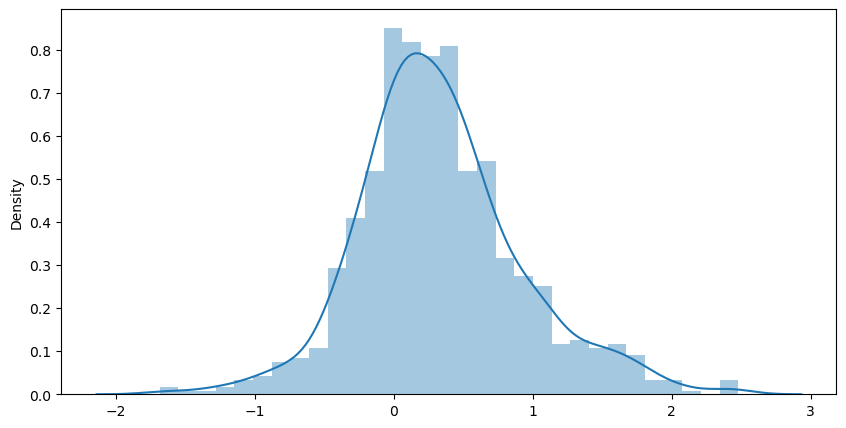

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
residuals = (y_test- result)
sns.distplot(residuals)

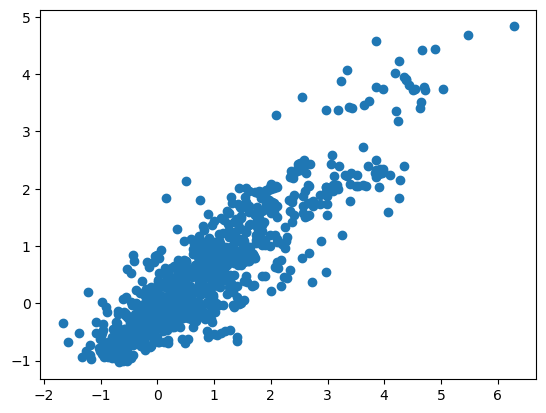

In [23]:
plt.scatter(y_test, result)
plt.plot([0,1],[0,1])

In [24]:
data1 = pd.DataFrame({'origin':y_test * std['y'] + mean['y'],'predict':result* std['y'] + mean['y'],
                     'residual':(y_test * std['y'] + mean['y']) - (result* std['y'] + mean['y'])})
percentage_error = np.mean(np.abs(data1['origin'] - data1['predict'])) / np.mean(data1['origin']) * 100
data1['residual_abs'] = data1['residual'].abs()
data1['y10'] = data1['origin'] / 10 - data1['residual_abs']
data1['y20'] = data1['origin'] / 5 - data1['residual_abs']
data1['y30'] = data1['origin'] / 3.333 - data1['residual_abs']
data1.loc[data1['y10'] >= 0, 'y10'] = 1
data1.loc[data1['y10'] < 0 , 'y10'] = 0
data1.loc[data1['y20'] >= 0, 'y20'] = 1
data1.loc[data1['y20'] < 0 , 'y20'] = 0
data1.loc[data1['y30'] >= 0, 'y30'] = 1
data1.loc[data1['y30'] < 0 , 'y30'] = 0
print(data1)
print(f'預測房價落在實際房價+-10%內的機率為:{data1["y10"].mean()}')
print(f'預測房價落在實際房價+-20%內的機率為:{data1["y20"].mean()}')
print(f'預測房價落在實際房價+-30%內的機率為:{data1["y30"].mean()}')
print("Model Percentage Error: {:.2f}%".format(percentage_error))

       origin       predict      residual  residual_abs  y10  y20  y30
0     26748.0  23512.956607   3235.043393   3235.043393  0.0  1.0  1.0
1     35115.0  29348.782426   5766.217574   5766.217574  0.0  1.0  1.0
2     55439.0  47259.209623   8179.790377   8179.790377  0.0  1.0  1.0
3    101623.0  95707.417202   5915.582798   5915.582798  1.0  1.0  1.0
4     34477.0  48042.261845 -13565.261845  13565.261845  0.0  0.0  0.0
..        ...           ...           ...           ...  ...  ...  ...
887   45044.0  38488.049881   6555.950119   6555.950119  0.0  1.0  1.0
888   97957.0  70432.159930  27524.840070  27524.840070  0.0  0.0  1.0
889  100508.0  69043.447132  31464.552868  31464.552868  0.0  0.0  0.0
890   50009.0  45219.865000   4789.135000   4789.135000  1.0  1.0  1.0
891   65664.0  61482.286667   4181.713333   4181.713333  1.0  1.0  1.0

[892 rows x 7 columns]
預測房價落在實際房價+-10%內的機率為:0.40582959641255606
預測房價落在實際房價+-20%內的機率為:0.7466367713004485
預測房價落在實際房價+-30%內的機率為:0.9024663677130045
Mod

In [25]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
print(f"mean_absolute_error: {mean_absolute_error(y_test, result)}")
print(f"mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, result)}")
print(f"mean_squared_error: {mean_squared_error(y_test, result)}")
print(f"explained_variance_score: {explained_variance_score(y_test, result)}")
print(f"r2_score: {r2_score(y_test, result)}")
#print(f"r2_adj_score: {1 - (1 - r2_score(y_test, result)) * (feature_count - 1) / (df.shape[0] - feature_count - 1)}")

mean_absolute_error: 0.50108002124502
mean_absolute_percentage_error: 2.7004638199601563
mean_squared_error: 0.4549000446565206
explained_variance_score: 0.7892370652066393
r2_score: 0.7219738119457966
